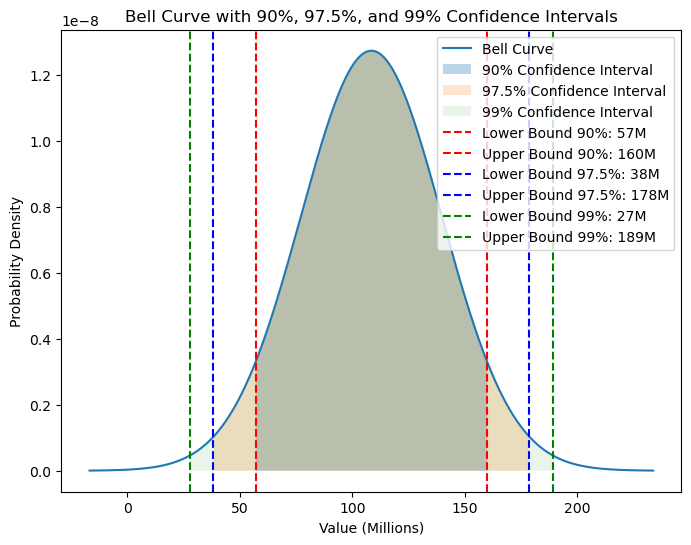

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the original confidence interval (90%) and mean, stddev estimates
confidence_interval_90 = (57e6, 160e6)
mean = np.mean(confidence_interval_90)
std_dev = (confidence_interval_90[1] - confidence_interval_90[0]) / (2 * norm.ppf(0.95))

# Calculate confidence intervals for 97.5% and 99%
confidence_interval_975 = (mean - norm.ppf(0.9875) * std_dev, mean + norm.ppf(0.9875) * std_dev)
confidence_interval_99 = (mean - norm.ppf(0.995) * std_dev, mean + norm.ppf(0.995) * std_dev)

# Generate x values for the bell curve
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = norm.pdf(x, mean, std_dev)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x / 1e6, y, label='Bell Curve')  # Divide x by 1e6 for millions

# Highlight the 90% confidence interval
x_fill_90 = np.linspace(confidence_interval_90[0], confidence_interval_90[1], 1000)
y_fill_90 = norm.pdf(x_fill_90, mean, std_dev)
plt.fill_between(x_fill_90 / 1e6, y_fill_90, alpha=0.3, label='90% Confidence Interval')

# Highlight the 97.5% confidence interval
x_fill_975 = np.linspace(confidence_interval_975[0], confidence_interval_975[1], 1000)
y_fill_975 = norm.pdf(x_fill_975, mean, std_dev)
plt.fill_between(x_fill_975 / 1e6, y_fill_975, alpha=0.2, label='97.5% Confidence Interval')

# Highlight the 99% confidence interval
x_fill_99 = np.linspace(confidence_interval_99[0], confidence_interval_99[1], 1000)
y_fill_99 = norm.pdf(x_fill_99, mean, std_dev)
plt.fill_between(x_fill_99 / 1e6, y_fill_99, alpha=0.1, label='99% Confidence Interval')

# Customize the plot
plt.title('Bell Curve with 90%, 97.5%, and 99% Confidence Intervals')
plt.xlabel('Value (Millions)')
plt.ylabel('Probability Density')
plt.axvline(confidence_interval_90[0] / 1e6, color='red', linestyle='--', label=f'Lower Bound 90%: {int(confidence_interval_90[0]/1e6)}M')
plt.axvline(confidence_interval_90[1] / 1e6, color='red', linestyle='--', label=f'Upper Bound 90%: {int(confidence_interval_90[1]/1e6)}M')
plt.axvline(confidence_interval_975[0] / 1e6, color='blue', linestyle='--', label=f'Lower Bound 97.5%: {int(confidence_interval_975[0]/1e6)}M')
plt.axvline(confidence_interval_975[1] / 1e6, color='blue', linestyle='--', label=f'Upper Bound 97.5%: {int(confidence_interval_975[1]/1e6)}M')
plt.axvline(confidence_interval_99[0] / 1e6, color='green', linestyle='--', label=f'Lower Bound 99%: {int(confidence_interval_99[0]/1e6)}M')
plt.axvline(confidence_interval_99[1] / 1e6, color='green', linestyle='--', label=f'Upper Bound 99%: {int(confidence_interval_99[1]/1e6)}M')
plt.legend()

# Show the plot
plt.show()
